<div align="right">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/wisaaco/TallerPythonEBAP/blob/main/lessons/5_Pandas_Groups.ipynb)

Si no funciona el botó podeu copiar el següent [enllaç](https://colab.research.google.com/github/wisaaco/TallerPythonEBAP/blob/main/lessons/5_Pandas_Groups.ipynb)
</div>

# 5 - Pandas: agrupacions de dades

Les agrupacions són operacions necessàries per a analitzar dades, ja que permeten extreure informació en funció de dades categòriques del nostre dataframe.

Començarem aquest aprenentatge amb les següents dades

In [1]:
import pandas as pd
from tabulate import tabulate # Nova llibreria

df = pd.read_csv("data/data_groups.csv") # Atenció: Dades creades aleatòriament !!

print(tabulate(df.head(), headers='keys'))

print("-"*30)
print(df.columns)
print("-"*30)
print(df.shape)

      Unnamed: 0  Dni        Nom                             CP  Ciutat      Genere    Tipus certificat cat      Punts
--  ------------  ---------  ----------------------------  ----  ----------  --------  ----------------------  -------
 0             0  H61414629  María Dolores Arjona Jove     7800  Eivissa     M         B                            73
 1             1  S3138381C  Núria Quirós                  7511  Ruberts     F         A                            40
 2             2  J8698188C  Miguel José María Gil Vargas  7340  Alaro       M         A                            45
 3             3  A48821615  Jordi Chaves Bustamante       7609  Bellavista  F         B                            40
 4             4  U0247281I  Jana Rosa Collado Menéndez    7006  Palma       M         B                            86
------------------------------
Index(['Unnamed: 0', 'Dni', 'Nom', 'CP', 'Ciutat', 'Genere',
       'Tipus certificat cat', 'Punts'],
      dtype='object')
------------

Activitats "d'escalfament"

In [3]:
#A401 - Quines i quantes ciutats n'hi ha?


In [4]:
#A402 - Suprimeix la columna primera: "Unnamed: 0"


In [5]:
#A403 - Llista les files 3, 4 i 5 amb les columnes de Nom i Punts


In [6]:
#A404 - Crea dues columnes noves amb nom i llinatges de l'actual columna de "Nom".


In [7]:
#A405 - Quantes categories de "Tipus de certificat cat" ?

## Grups

Per a agrupar només cal usar el mètode de `groupby`. <br/>

En el següent exemple agrupem les dades segons el gènere de la persona mitjançant el mètode `groupby` que retorna un `DataFrame` agrupat:

In [2]:
grupGenere = df.groupby('Genere')
type(grupGenere)

pandas.core.groupby.generic.DataFrameGroupBy

In [3]:
print(grupGenere)

In [4]:
grupGenere

Una agupació té sentit quan se fà qualque tipus d'agregació de dades. Ara mateix la variable `grupGenere` només te informació computacional que separa els elements de cada tipus de grup. Hem de fer qualque operació, com per exemple, `describe()`

In [9]:
# Podem descriure la informació d'un "[DataFrame]Groupby"
grupGenere.describe()

Unnamed: 0                                                           \
            count        mean         std  min    25%    50%    75%    max   
Genere                                                                       
F           483.0  503.248447  290.076225  1.0  245.0  496.0  757.5  999.0   
M           517.0  495.998066  287.877191  0.0  253.0  502.0  744.0  998.0   

           CP               ...                  Punts                        \
        count         mean  ...     75%     max  count       mean        std   
Genere                      ...                                                
F       483.0  7519.567288  ...  7701.0  7870.0  483.0  50.084886  28.548551   
M       517.0  7533.143133  ...  7701.0  7870.0  517.0  49.321083  28.504273   

                                     
        min   25%   50%   75%   max  
Genere                               
F       1.0  24.5  50.0  74.0  99.0  
M       1.0  24.0  50.0  73.0  99.0  

[2 rows x 24 columns]

Només guarda quins elements pertanyen a cada categoria.
L'atribut `groups` ens mostra quines mostres/files pertanyen a cada grup:

In [5]:
grupGenere.groups # Quin tipus de variable és? Quina informació conté?

{'F': [1, 3, 6, 7, 8, 9, 12, 23, 25, 26, 28, 29, 32, 33, 35, 36, 38, 42, 43, 44, 45, 48, 53, 54, 57, 58, 59, 63, 65, 70, 71, 72, 79, 80, 81, 82, 84, 87, 88, 92, 94, 95, 97, 98, 99, 103, 105, 106, 107, 108, 111, 112, 115, 116, 117, 118, 120, 125, 128, 129, 132, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 147, 148, 150, 151, 153, 154, 155, 156, 161, 162, 163, 164, 165, 168, 170, 172, 174, 175, 176, 177, 178, 179, 181, 182, 184, 185, 188, 194, 196, ...], 'M': [0, 2, 4, 5, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 27, 30, 31, 34, 37, 39, 40, 41, 46, 47, 49, 50, 51, 52, 55, 56, 60, 61, 62, 64, 66, 67, 68, 69, 73, 74, 75, 76, 77, 78, 83, 85, 86, 89, 90, 91, 93, 96, 100, 101, 102, 104, 109, 110, 113, 114, 119, 121, 122, 123, 124, 126, 127, 130, 131, 133, 139, 145, 146, 149, 152, 157, 158, 159, 160, 166, 167, 169, 171, 173, 180, 183, 186, 187, 189, 190, 191, 192, 193, 195, 197, 199, 201, ...]}

Aquest atribut, (un dictionari) ens permet realitzar operacions de filtrat en funció dels grups:

In [6]:
dfM = df.loc[grupGenere.groups['M'].values] #Recorda que "loc" accedeix per index de fila
dfM

,Unnamed: 0,Dni,Nom,CP,Ciutat,Genere,Tipus certificat cat,Punts
0,0,H61414629,María Dolores Arjona Jove,7800,Eivissa,M,B,73
2,2,J8698188C,Miguel José María Gil Vargas,7340,Alaro,M,A,45
4,4,U0247281I,Jana Rosa Collado Menéndez,7006,Palma,M,B,86
5,5,V3761435A,Antonio Murillo Suarez,7701,Mao,M,B,53
10,10,A64863723,Nil Mínguez Hervás,7350,Binissalem,M,B,17
...,...,...,...,...,...,...,...,...
991,991,G28994028,Juan Cervera Arribas,7006,Palma,M,B,83
993,993,J3906733E,Josefa María Dolores Barreda Ibañez,7609,Bellavista,M,B,17
994,994,C26665125,Josefa Ferrando-Navas,7340,Alaro,M,A,56
996,996,H72967045,Álex Javier Campos Palomar,7701,Mao,M,B,72


Obviament: <br/>
Segons el tipus d'agrupació, l'operació pot realitzar-se com una selecció lògica.

In [7]:
df[df.Genere=="M"]

,Unnamed: 0,Dni,Nom,CP,Ciutat,Genere,Tipus certificat cat,Punts
0,0,H61414629,María Dolores Arjona Jove,7800,Eivissa,M,B,73
2,2,J8698188C,Miguel José María Gil Vargas,7340,Alaro,M,A,45
4,4,U0247281I,Jana Rosa Collado Menéndez,7006,Palma,M,B,86
5,5,V3761435A,Antonio Murillo Suarez,7701,Mao,M,B,53
10,10,A64863723,Nil Mínguez Hervás,7350,Binissalem,M,B,17
...,...,...,...,...,...,...,...,...
991,991,G28994028,Juan Cervera Arribas,7006,Palma,M,B,83
993,993,J3906733E,Josefa María Dolores Barreda Ibañez,7609,Bellavista,M,B,17
994,994,C26665125,Josefa Ferrando-Navas,7340,Alaro,M,A,56
996,996,H72967045,Álex Javier Campos Palomar,7701,Mao,M,B,72


In [8]:
#Cada dataframegroupby te dos elements: el id-value del grup i el df de elements d'aquest grup
for identificador, group in df.groupby('Genere'): 
    # Criteri de l'agrupacio: M o F 
    print("*"*10)
    print(identificador)
    print("*"*10)
    # Dataframe específic
    print(group.head())
    
    print("-"*60)

**********
F
**********
   Unnamed: 0        Dni                      Nom    CP      Ciutat Genere  \
1           1  S3138381C             Núria Quirós  7511     Ruberts      F   
3           3  A48821615  Jordi Chaves Bustamante  7609  Bellavista      F   
6           6  H16936148         Arlet del Rovira  7350  Binissalem      F   
7           7  E47121991         Emma Tapia Salas  7340       Alaro      F   
8           8  E15932486             Jana Barrios  7870   La Savina      F   

  Tipus certificat cat  Punts  
1                    A     40  
3                    B     40  
6                    A     54  
7                    C     60  
8                    A     35  
------------------------------------------------------------
**********
M
**********
    Unnamed: 0        Dni                           Nom    CP      Ciutat  \
0            0  H61414629     María Dolores Arjona Jove  7800     Eivissa   
2            2  J8698188C  Miguel José María Gil Vargas  7340       Alaro   

## Agregacions


El mètodo  `aggregate` ens permet crear variables d'agregació sobre la taula obtinguda amb `groupby`. <br/>Indicarem la informació que volem obtenir de cada columna amb un diccionari. Especifiquem la funció que aplicarem a les dades de cada grup en cada columna per a obtenir un únic valor.

-  Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html


In [17]:
df.groupby(["Tipus certificat cat"]).aggregate(
    {               # Dictionari
    "Punts":sum     # Columna : Operacion de agregació
    }
    ) # 

,Punts
Tipus certificat cat,
A,22502
B,17289
C,7399
D,2500


Podem aplicar un gran nombre de funcions d'agregació:

- [Funcions estadístiques](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html): mean, std, ...

- [Funcions matemàtiques](https://docs.scipy.org/doc/numpy/reference/routines.math.html): sum, prod, ...

- Altres funcions: max, min, ...


In [18]:
df.groupby(["Tipus certificat cat"]).aggregate({"Punts":max}) 

,Punts
Tipus certificat cat,
A,99
B,99
C,99
D,99


Si volem incloure la mateixa columna múltiples vegades, hem de fer servir el mètode `agg`

In [23]:
import numpy as np
## Una manera
dftipus = df.groupby(["Tipus certificat cat"]).agg(Maximo=('Punts', max), Minim=('Punts', 'min'), Mitj=('Punts', np.mean))
dftipus

,Maximo,Minim,Mitj
Tipus certificat cat,,,
A,99,1,50.115813
B,99,1,49.681034
C,99,1,48.045455
D,99,1,51.020408


In [25]:
type(dftipus) #Nota: Una vegada feta una agregació damunt una agrupació obtenim un dataframe !!!

pandas.core.frame.DataFrame

In [26]:
dftipus[dftipus.Mitj<50]

,Maximo,Minim,Mitj
Tipus certificat cat,,,
B,99,1,49.681034
C,99,1,48.045455


**Activitats**


In [ ]:
# A) Quina estructura té aquest dataframe: shape, index, columns?


In [28]:
# B) Pots accedir al valor mínim del certificat "C"


In [29]:
# C) Pots canviar el nom a les columnes a "max punts", "min punts" i "mitjana punts", respectivament.

Altres maneres de fer aggregacions

In [31]:
# Una altra manera
dftipus2 = df.groupby(["Tipus certificat cat"]).agg({
        'Punts': ['mean', 'count', np.min, np.std], 
   })

dftipus2 

Punts                      
                           mean count amin        std
Tipus certificat cat                                 
A                     50.115813   449    1  28.518712
B                     49.681034   348    1  28.271817
C                     48.045455   154    1  27.907724
D                     51.020408    49    1  32.520180

In [32]:
dftipus2.columns ## ALERTA ! MULTIINDEX

MultiIndex([('Punts',  'mean'),
            ('Punts', 'count'),
            ('Punts',  'amin'),
            ('Punts',   'std')],
           )

In [39]:
#Si volem accedir a una columna específica

dftipus2["Punts"]["mean"] ### Obliga a fer ús d'un conjunt seguit de "keys" de columnes

Tipus certificat cat
A    50.115813
B    49.681034
C    48.045455
D    51.020408
Name: mean, dtype: float64

In [40]:
dftipus2[("Punts","mean")] ### O fer us del concepte de tupla

Tipus certificat cat
A    50.115813
B    49.681034
C    48.045455
D    51.020408
Name: (Punts, mean), dtype: float64

## Agrupacions amb múltiples columnes

En una agrupació amb diversos criteris, es creen totes les combinacions possibles entre els criteris donant lloc a un producte cartesià de les agregacions indicades.

In [67]:
dftc = df.groupby(["Tipus certificat cat","Ciutat"]).mean()
dftc

Unnamed: 0           CP      Punts
Tipus certificat cat Ciutat                                        
A                    Alaro       447.929825  7340.000000  50.789474
                     Ariany      547.203704  7529.000000  52.537037
                     Bellavista  499.148936  7609.000000  46.787234
                     Binissalem  535.375000  7350.000000  44.325000
                     Eivissa     504.931818  7800.000000  52.227273
                     La Savina   468.194444  7870.000000  47.944444
                     Mao         528.918919  7701.864865  47.027027
                     Palma       471.918367  7009.469388  51.081633
                     Pedruscada  475.347826  7590.000000  56.847826
                     Ruberts     503.487179  7511.000000  49.128205
B                    Alaro       485.333333  7340.000000  52.452381
                     Ariany      496.404762  7529.000000  49.166667
                     Bellavista  540.851852  7609.000000  44.185185
                     Binissalem  560.909091  7350.000000  52.787879
                     Eivissa     525.484848  7800.000000  47.393939
                     La Savina   524.470588  7870.000000  44.441176
                     Mao         497.040816  7701.775510  50.673469
                     Palma       493.062500  7008.625000  55.375000
                     Pedruscada  486.606061  7590.000000  50.484848
                     Ruberts     391.956522  7511.000000  47.391304
C                    Alaro       451.625000  7340.000000  39.687500
                     Ariany      606.583333  7529.000000  41.833333
                     Bellavista  503.111111  7609.000000  37.500000
                     Binissalem  478.058824  7350.000000  67.823529
                     Eivissa     525.777778  7800.000000  41.444444
                     La Savina   508.357143  7870.000000  52.500000
                     Mao         433.428571  7701.857143  52.428571
                     Palma       371.333333  7011.666667  33.083333
                     Pedruscada  554.000000  7590.000000  53.166667
                     Ruberts     541.823529  7511.000000  51.235294
D                    Alaro       203.200000  7340.000000  66.800000
                     Ariany      446.600000  7529.000000  47.200000
                     Bellavista  728.833333  7609.000000  56.333333
                     Binissalem  470.000000  7350.000000  67.666667
                     Eivissa     581.800000  7800.000000  35.800000
                     La Savina   455.333333  7870.000000  43.000000
                     Mao         467.000000  7703.000000  20.000000
                     Palma       613.666667  7008.000000  30.333333
                     Pedruscada  496.777778  7590.000000  66.777778
                     Ruberts     636.833333  7511.000000  40.000000

Observacions
- És necessari la mitja de "CP"?
  
Activitat


In [41]:
# A) Fes que només surti la columna de "Punts" a l'agrupació anterior.


In [42]:
# B) Pots seleccionar només les mostres de Mao.

In [ ]:
# C) Com podries calcular la mida de cada grup?

## MultIndex 

A vegades un índex no és suficient per expressar la meta-informació que identifica una o algunes columnes. Per exemple, una coordenada està formada per la latitud i longitud.

Un `multindex` és una jerarquia d'índexs.

Una agrupació amb diferents criteris origina un multiindex

In [45]:
dftc = df.groupby(["Tipus certificat cat","Ciutat"]).mean()
dftc.index

MultiIndex([('A',      'Alaro'),
            ('A',     'Ariany'),
            ('A', 'Bellavista'),
            ('A', 'Binissalem'),
            ('A',    'Eivissa'),
            ('A',  'La Savina'),
            ('A',        'Mao'),
            ('A',      'Palma'),
            ('A', 'Pedruscada'),
            ('A',    'Ruberts'),
            ('B',      'Alaro'),
            ('B',     'Ariany'),
            ('B', 'Bellavista'),
            ('B', 'Binissalem'),
            ('B',    'Eivissa'),
            ('B',  'La Savina'),
            ('B',        'Mao'),
            ('B',      'Palma'),
            ('B', 'Pedruscada'),
            ('B',    'Ruberts'),
            ('C',      'Alaro'),
            ('C',     'Ariany'),
            ('C', 'Bellavista'),
            ('C', 'Binissalem'),
            ('C',    'Eivissa'),
            ('C',  'La Savina'),
            ('C',        'Mao'),
            ('C',      'Palma'),
            ('C', 'Pedruscada'),
            ('C',    'Ruberts'),
          

In [46]:
dftc.loc["A"] # primer index

,Unnamed: 0,CP,Punts
Ciutat,,,
Alaro,447.929825,7340.000000,50.789474
Ariany,547.203704,7529.000000,52.537037
Bellavista,499.148936,7609.000000,46.787234
Binissalem,535.375000,7350.000000,44.325000
Eivissa,504.931818,7800.000000,52.227273
La Savina,468.194444,7870.000000,47.944444
Mao,528.918919,7701.864865,47.027027
Palma,471.918367,7009.469388,51.081633
Pedruscada,475.347826,7590.000000,56.847826


In [ ]:
dftc.loc["Mao"] # dependent index

In [53]:
dftc.loc[("A","Mao")]

Unnamed: 0     528.918919
CP            7701.864865
Punts           47.027027
Name: (A, Mao), dtype: float64

In [55]:
#Podem seleccionar totes les Categories de Mao
dftc.loc[[:,"Mao"]]

SyntaxError: invalid syntax (837983254.py, line 2)

In [56]:
# Una manera més elegant és:
dftc.loc[pd.IndexSlice[:, 'Mao'],:] # Quins parametres n'hi ha? LOC i IndexSlice
# https://pandas.pydata.org/docs/reference/api/pandas.IndexSlice.html

,,Unnamed: 0,CP,Punts
Tipus certificat cat,Ciutat,,,
A,Mao,528.918919,7701.864865,47.027027
B,Mao,497.040816,7701.775510,50.673469
C,Mao,433.428571,7701.857143,52.428571
D,Mao,467.000000,7703.000000,20.000000


In [83]:
dfBCMao = dftc.loc[pd.IndexSlice[["B","C"], 'Mao'],"Punts"]
dfBCMao

Tipus certificat cat  Ciutat
B                     Mao       50.673469
C                     Mao       52.428571
Name: Punts, dtype: float64

Una altra opció és `aplanar` o `esborrar` l'índex

In [89]:
dftc = df.groupby(["Tipus certificat cat","Ciutat"]).mean().reset_index()
print(dftc)

   Tipus certificat cat      Ciutat  Unnamed: 0           CP      Punts
0                     A       Alaro  447.929825  7340.000000  50.789474
1                     A      Ariany  547.203704  7529.000000  52.537037
2                     A  Bellavista  499.148936  7609.000000  46.787234
3                     A  Binissalem  535.375000  7350.000000  44.325000
4                     A     Eivissa  504.931818  7800.000000  52.227273
5                     A   La Savina  468.194444  7870.000000  47.944444
6                     A         Mao  528.918919  7701.864865  47.027027
7                     A       Palma  471.918367  7009.469388  51.081633
8                     A  Pedruscada  475.347826  7590.000000  56.847826
9                     A     Ruberts  503.487179  7511.000000  49.128205
10                    B       Alaro  485.333333  7340.000000  52.452381
11                    B      Ariany  496.404762  7529.000000  49.166667
12                    B  Bellavista  540.851852  7609.000000  44

In [93]:
print(dftc[dftc["Ciutat"]=="Mao"])

   Tipus certificat cat Ciutat  Unnamed: 0           CP      Punts
6                     A    Mao  528.918919  7701.864865  47.027027
16                    B    Mao  497.040816  7701.775510  50.673469
26                    C    Mao  433.428571  7701.857143  52.428571
36                    D    Mao  467.000000  7703.000000  20.000000


In [96]:
print(dftc[dftc["Ciutat"]=="Mao"].Punts) # Quina informació trobeu?


6     47.027027
16    50.673469
26    52.428571
36    20.000000
Name: Punts, dtype: float64


**Activitat**

In [59]:
# Com podem agafar només les categories B i C de la ciutat de Mao?

## Agregacions avançades

Damunt d'una agregació podem fer operacions diferents a les aritmètiques. <br/> 

Per exemple, si volem crear un histograma de la distribució de tipus de certificat per Ciutat i CP, necessitem crear una llista per a cada grup.

In [3]:
# Obtindre un llistat de certificats per agrupació de ciutat i codi postalu
import pandas as pd
df = pd.read_csv("data/data_groups.csv") 
df.head()

,Unnamed: 0,Dni,Nom,CP,Ciutat,Genere,Tipus certificat cat,Punts
0,0,H61414629,María Dolores Arjona Jove,7800,Eivissa,M,B,73
1,1,S3138381C,Núria Quirós,7511,Ruberts,F,A,40
2,2,J8698188C,Miguel José María Gil Vargas,7340,Alaro,M,A,45
3,3,A48821615,Jordi Chaves Bustamante,7609,Bellavista,F,B,40
4,4,U0247281I,Jana Rosa Collado Menéndez,7006,Palma,M,B,86


In [4]:
dfc = df.groupby(["Ciutat","CP"])["Tipus certificat cat"].apply(list)
dfc

Ciutat      CP  
Alaro       7340    [A, C, B, A, A, B, A, D, A, B, A, B, B, A, B, ...
Ariany      7529    [B, A, B, A, A, B, A, B, A, B, A, A, C, A, B, ...
Bellavista  7609    [B, C, A, A, A, C, A, A, B, A, A, A, B, A, C, ...
Binissalem  7350    [A, B, B, C, C, A, A, A, C, A, C, A, B, B, D, ...
Eivissa     7800    [B, A, A, B, B, B, A, A, A, A, B, C, A, A, B, ...
La Savina   7870    [A, A, A, B, A, A, B, B, A, A, B, A, B, B, A, ...
Mao         7701    [B, C, B, C, B, C, A, B, B, B, A, C, C, A, C, ...
            7703    [B, A, B, C, A, A, B, A, C, B, A, B, C, A, B, ...
Palma       7006    [B, A, B, B, A, A, A, B, B, A, A, B, B, A, B, ...
            7009    [A, D, A, B, C, A, A, C, B, A, A, A, C, A, A, ...
            7013    [A, A, B, C, C, C, C, A, A, A, B, A, C, C, A, ...
Pedruscada  7590    [A, B, A, A, A, A, B, B, C, B, B, B, C, A, A, ...
Ruberts     7511    [A, A, A, B, C, A, B, A, A, B, B, A, C, B, B, ...
Name: Tipus certificat cat, dtype: object

In [5]:
# Podem fer més operatives amb els valors obtinguts
# Calcula la distribucció de tipus de certificats 
tipusAlaro = dfc.loc[pd.IndexSlice["Alaro",7340]]

import numpy as np 
values, counts = np.unique(tipusAlaro, return_counts=True)
print(values) # Tipus 
print(counts) # quantitat
print("-"*40)
distribucioAlaro = dict(zip(values,counts)) ## Que fa el ZIP?!
print(distribucioAlaro)

['A' 'B' 'C' 'D']
[57 42 16  5]
----------------------------------------
{'A': 57, 'B': 42, 'C': 16, 'D': 5}


In [15]:
## També podem invocar funcions especifiques! en lloc de una sum, mean, max, etc.
df2 = df.groupby(["Ciutat","CP"]).agg(
        {"Tipus certificat cat": [lambda x: list(x), np.size]}) # lambda !

print(df2)


                                              Tipus certificat cat     
                                                        <lambda_0> size
Ciutat     CP                                                          
Alaro      7340  [A, C, B, A, A, B, A, D, A, B, A, B, B, A, B, ...  120
Ariany     7529  [B, A, B, A, A, B, A, B, A, B, A, A, C, A, B, ...  113
Bellavista 7609  [B, C, A, A, A, C, A, A, B, A, A, A, B, A, C, ...   98
Binissalem 7350  [A, B, B, C, C, A, A, A, C, A, C, A, B, B, D, ...   93
Eivissa    7800  [B, A, A, B, B, B, A, A, A, A, B, C, A, A, B, ...   91
La Savina  7870  [A, A, A, B, A, A, B, B, A, A, B, A, B, B, A, ...   90
Mao        7701  [B, C, B, C, B, C, A, B, B, B, A, C, C, A, C, ...   63
           7703  [B, A, B, C, A, A, B, A, C, B, A, B, C, A, B, ...   45
Palma      7006  [B, A, B, B, A, A, A, B, B, A, A, B, B, A, B, ...   36
           7009  [A, D, A, B, C, A, A, C, B, A, A, A, C, A, A, ...   23
           7013  [A, A, B, C, C, C, C, A, A, A, B, A, C, C, A, .

In [16]:
# Qué és una funció lambda?

In [17]:
# Em aquest exemple apliquem una funció que té un criterí més específic:

def miBarem50p(serie):
  up50list = []
  for value in serie.values:
    if value>50:
      up50list.append(value)
  return len(up50list)


df3 = df.groupby(["Ciutat","CP"]).agg(
        {"Punts": [lambda x: miBarem50p(x), np.size]}) # lambda: què és X?

print(df3) #Quina interpretació dels resultats feu?

                     Punts     
                <lambda_0> size
Ciutat     CP                  
Alaro      7340         61  120
Ariany     7529         56  113
Bellavista 7609         43   98
Binissalem 7350         50   93
Eivissa    7800         44   91
La Savina  7870         41   90
Mao        7701         34   63
           7703         18   45
Palma      7006         19   36
           7009         10   23
           7013         19   37
Pedruscada 7590         65  106
Ruberts    7511         36   85


Les agrupacions són un mecanisme de selecció agregada de la informació. I el resultat, són tipus compatibles: dataframes o sèries, per tant, entre altres coses, podem fer una visualització:

In [18]:
df3.columns = ['Candidats per damunt dels 50 punts',"Candidats totals"]
df3.reset_index(inplace=True)
df3.drop(columns="CP",inplace=True)
df3.index = df3.Ciutat

<AxesSubplot:xlabel='Ciutat'>

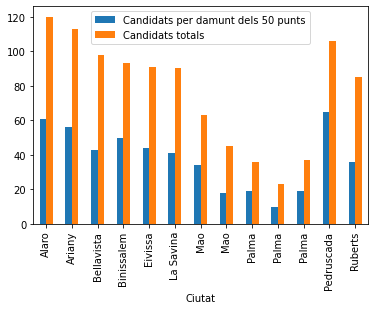

In [19]:
df3.plot(kind="bar") #Alerta amb la interpretació: punts per CP i Ciutat

## Activitat

A) Agrupa les dades pel nom de l'escola.
- Quina escola té més infants?
- Quina escola té els infants més alts?

In [20]:
data = {
    'school': ['s001', 's002', 's003', 's001', 's002', 's004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco', 'Gino Mcneill', 'Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_Of_Birth': ['15/05/2002', '17/05/2002', '16/02/1999', '25/09/1998', '11/05/2002', '15/09/1997'],
    'age': [12, 12, 13, 13, 14, 12],
    'height': [173, 192, 186, 167, 151, 159],
    'weight': [35, 32, 33, 30, 31, 32],
    'address': ['street1', 'street2', 'street3', 'street1', 'street2', 'street4']
}

df = pd.DataFrame(data, index=['S1', 'S2', 'S3', 'S4','S5','S6'])
df.head()


,school,class,name,date_Of_Birth,age,height,weight,address
S1,s001,V,Alberto Franco,15/05/2002,12,173,35,street1
S2,s002,V,Gino Mcneill,17/05/2002,12,192,32,street2
S3,s003,VI,Ryan Parkes,16/02/1999,13,186,33,street3
S4,s001,VI,Eesha Hinton,25/09/1998,13,167,30,street1
S5,s002,V,Gino Mcneill,11/05/2002,14,151,31,street2


In [21]:
#TODO

A) Donat aquest llistat de vendes:
- Quin comprador ha gastat més?
- Quin vendedor ha fet més vendes?

In [22]:
import pandas as pd
import numpy as np

# Crear datos aleatorios
n = 15
productos = ['Producto ' + str(i) for i in range(1, n+1)]
precios = np.random.randint(10, 100, n)
compradores = np.random.choice(['Juan', 'Pedro', 'Maria', 'Ana'], n)
vendedores = np.random.choice(['Carlos', 'Laura', 'Miguel', 'Elena'], n)

# Crear DataFrame
df_ventas = pd.DataFrame({
    'Producto': productos,
    'Precio': precios,
    'Comprador': compradores,
    'Vendedor': vendedores
})

print(df_ventas)


       Producto  Precio Comprador Vendedor
0    Producto 1      18      Juan   Miguel
1    Producto 2      83     Pedro    Laura
2    Producto 3      13       Ana   Carlos
3    Producto 4      29      Juan    Elena
4    Producto 5      28     Maria   Miguel
5    Producto 6      15     Maria   Miguel
6    Producto 7      64     Maria   Miguel
7    Producto 8      10       Ana    Laura
8    Producto 9      94     Maria    Elena
9   Producto 10      18      Juan   Miguel
10  Producto 11      20     Maria    Laura
11  Producto 12      68     Maria    Laura
12  Producto 13      59      Juan   Miguel
13  Producto 14      42     Pedro    Laura
14  Producto 15      50     Maria    Elena


In [23]:
#TODO

A)  Usant el fitxer 1/data/WHO.csv, Quin és el volum total de CO2 emès per cada continent? Qui continent emet més CO2?

In [198]:
#TODO

B) Usant el fitxer 1/data/WHO.csv, Quants països hi ha per continent? Quin continent té més països?

In [197]:
#TODO

C) Usant el fitxer 1/data/presupuesto_gastos_2023.csv, Calcula la despesa total per "SAILAREN DESKRIBAPENA_EU/DESCRIPCION DEPARTAMENTO_CAS" ? Ordena el resultats per despesa (descendent)

In [ ]:
#TODO

D) Fitxer "data/data_groups_cursos.csv", El fitxer conté cursos realitzats per persones. Cada mostra correspon a un curs.
Es demana obtenir un llistat de número de cursos realitzat per cada persona, una valoració de punts segons el curs de la següent manera:
- 'A': 3 punts
- 'B': 2 punts
- 'C': 1 punt
- 'D': 0.5 punt
- "E": 0.5 punt
- "F": 1 punt
  

In [199]:
#TODO

D.2 (amb el anterior cas D), tonar a calcula la valoració de punts considerant la combinació de cursos (independentment del seu ordre):
- A, B i C : +10 punts
- A i F: +3 punts
- E i F: -10 punts
- C i F:  +5 punts

In [201]:
#TODO

Z) Activitat 4 del homework [enllaç](https://colab.research.google.com/github/wisaaco/TallerPythonEBAP/blob/main/homework/00/activitat_4.ipynb)

[![License: CC BY 4.0](https://img.shields.io/badge/License-CC_BY_4.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/) <br/>
Isaac Lera and Gabriel Moya <br/>
Universitat de les Illes Balears <br/>
isaac.lera@uib.edu, gabriel.moya@uib.edu